https://dacon.io/competitions/official/235647/codeshare/1812?page=2&dtype=recent

https://dacon.io/competitions/official/235647/codeshare/1701?page=1&dtype=vote

# 1. 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import eli5
from itertools import combinations
from IPython.display import Image
from string import ascii_lowercase
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

### 1-1. Train 

In [2]:
train = pd.read_csv('train.csv')
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1


### 1-2. Test 

In [3]:
test = pd.read_csv('test_x.csv')
test

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,1,1,0,1,1,0,1,0,1,1
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,1,1,1,1,1,1,1,1,1
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,1,1,0,1,1,0,1,0,1,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,1,0,0,1,1,0,1,1,1,0


# 2. 데이터 확인 

https://www.dacon.io/competitions/official/235647/talkboard/401534?page=1&dtype=recent&ptype=pub

### 2-1. Train 변수 확인

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

- 총 78개의 컬럼
- 0 : index -->삭제 예정
- 1-40 : Q_A (a-t) - 질문에 대한 답변 (1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree), Q_E (a-t) - 질문을 답할 때 까지의 시간
- 41 : age_group - 연령
- 42 : education - 교육 수준 (1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답)
- 43 : engnat - 모국어가 영어 (1=Yes, 2=No, 0=무응답)
- 44: familysize - 형제자매 수
- 45 : gender - 성별(Male, Female) **--> 0 / 1로 바꿀 예정**
- 46 : hand - 필기하는 손 (1=Right, 2=Left, 3=Both, 0=무응답)
- 47 : married  - 혼인 상태 (1=Never married, 2=Currently married, 3=Previously married, 0=Other)
- 48 : race - 인종 (Asian, Arab, Black, Indigenous Australian, Native American, White, Other) **---> 원-핫 인코딩으로 변환 예정?**
- 49 : religion - 종교 (Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other) **---> 원-핫 인코딩으로 변환 예정?**
- 50-59 : tp_(01-10) - 본인에 대한 평가?
- 60 : urban - 유년기의 거주 구역 (1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답)
- 61 : voted - 지난 해 국가 선거 투표 여부 (1=Yes, 2=No) **--> 타겟**
- 62-64 : wf__(01~03) - 허구인 단어의 정의 정의를 앎(1=Yes, 0=No)
- 65-64 : wr__(01~13) - 실존하는 해당 단어의 정의를 앎 (1=Yes, 0=No)
- NULL값 없음. age_group, gender, race, religion 컬럼 제외하고는 전부 수치형

### 2-2. Test 변수 확인

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       11383 non-null  int64  
 1   QaA         11383 non-null  float64
 2   QaE         11383 non-null  int64  
 3   QbA         11383 non-null  float64
 4   QbE         11383 non-null  int64  
 5   QcA         11383 non-null  float64
 6   QcE         11383 non-null  int64  
 7   QdA         11383 non-null  float64
 8   QdE         11383 non-null  int64  
 9   QeA         11383 non-null  float64
 10  QeE         11383 non-null  int64  
 11  QfA         11383 non-null  float64
 12  QfE         11383 non-null  int64  
 13  QgA         11383 non-null  float64
 14  QgE         11383 non-null  int64  
 15  QhA         11383 non-null  float64
 16  QhE         11383 non-null  int64  
 17  QiA         11383 non-null  float64
 18  QiE         11383 non-null  int64  
 19  QjA         11383 non-nul

###### voted 컬럼이 없는 것 말고는 train과 동일

# 3. EDA - 마키아벨리니즘 테스트(MACH-4)

https://dacon.io/competitions/official/235647/codeshare/1711?page=1&dtype=recent&ptype=pub

https://dacon.io/competitions/official/235647/talkboard/401557?page=1&dtype=vote

Mach-IV의 subscales : Tactics, Morality, Views

### 3-1. MACH-4 질문

- Qa : Secret
- Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
- Qc : Anyone who completely trusts anyone else is asking for trouble.
- Qd : Secret
- Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.
- Qf : There is no excuse for lying to someone else.
- Qg : Secret
- Qh : Most people forget more easily the death of their parents than the loss of their property.
- Qi : Secret
- Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.
- Qk : All in all, it is better to be humble and honest than to be important and dishonest.
- Ql : Secret
- Qm : It is hard to get ahead without cutting corners here and there.
- Qn : Secret
- Qo : The best way to handle people is to tell them what they want to hear.
- Qp : Secret
- Qq : Most people are basically good and kind.
- Qr : One should take action only when sure it is morally right.
- Qs : It is wise to flatter important people.
- Qt : Secret

- Qa : Secret
- Qb : 범죄자들과 다른 일반 사람들의 가장 큰 차이점은, 범죄자들이 잡힐만큼 멍청하다는 것이다.
- Qc : 누군가를 완전히 믿는 사람은 고생을 자처하는 것이다.
- Qd : Secret
- Qe : P.T. Barnum이 '매 분마다 선천적으로 잘 속는 사람이 태어난다'라고 말한 것은 틀립니다.
- Qf : 모든 상황에 있어서 정직이 최선이다.
- Qg : Secret
- Qh : 대부분의 사람들은 그들의 재산을 잃은 것보다 부모의 죽음을 더 빨리 잊는다.
- Qi : Secret
- Qj : 모든 사람에게는 악한 경향이 있고, 기회만 주어진다면 그 성향이 표현된다고 가정하는 것이 가장 안전하다.
- Qk : 대체로 겸손하고 정직한 것이, 중요하고 부정직한 것보다 낫다.
- Ql : Secret
- Qm : 여기저기를 질러가지 않는다면 앞으로 나아가기 힘들다.(요령이 없으면 앞으로 나아가기 힘들다.)
- Qn : Secret
- Qo : 사람을 다루는 가장 좋은 방법은 그들이 듣기 원하는 말을 해주는 것이다.
- Qp : Secret
- Qq : 대부분의 사람들은 기본적으로 선하며, 착하다.
- Qr : 도덕적으로 올바른 일일때만, 그 행동을 해야 한다.
- Qs : 중요한 사람들에게 아첨하는 것이 현명하다.
- Qt : Secret

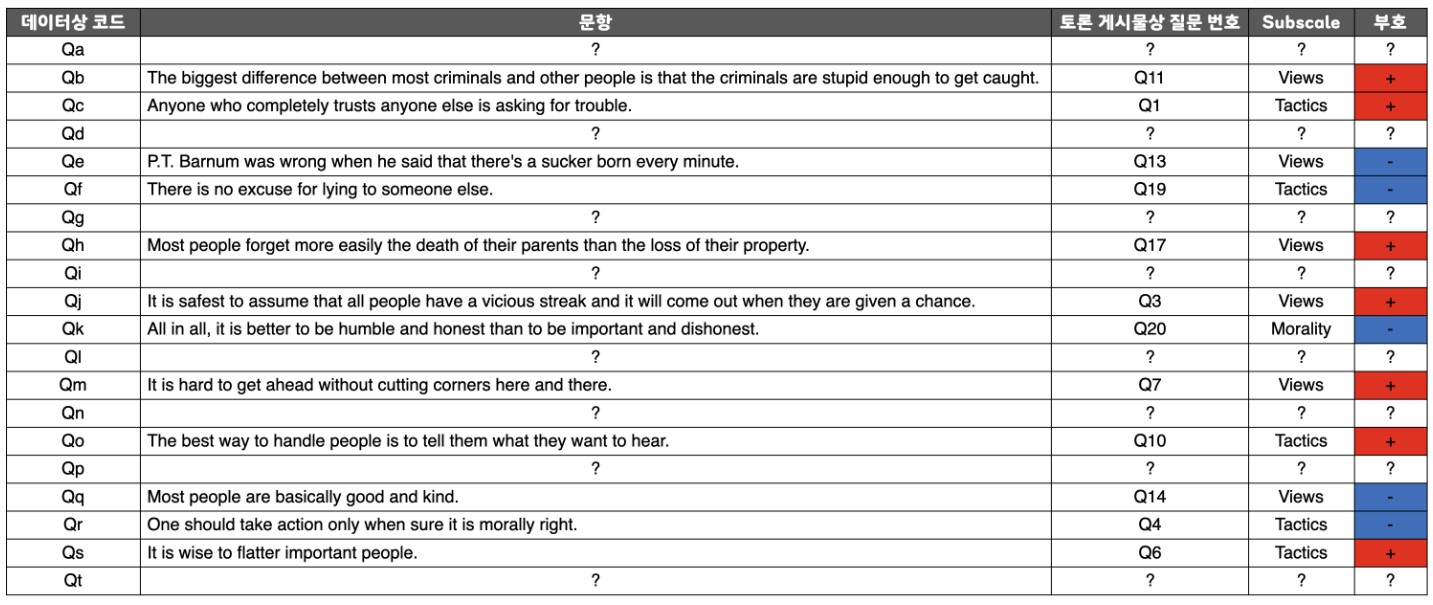

In [6]:
Image("MACH-4.jpg")

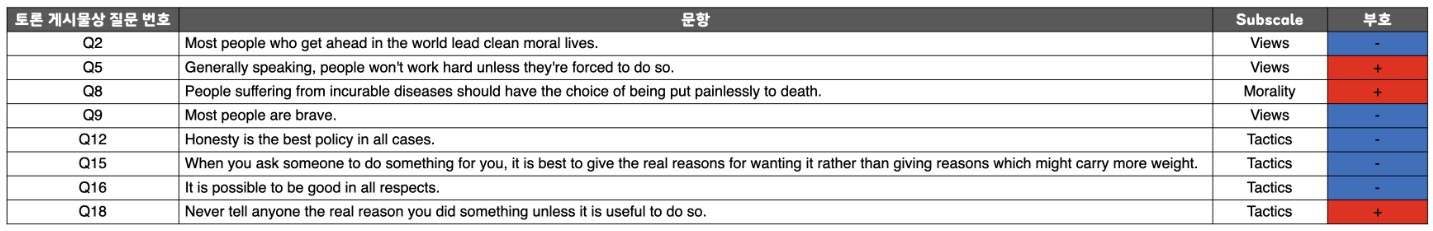

In [7]:
Image("MACH-4-secret.jpg")

- 당신이 어떤 일을 한 이유를 필요할 때를 제외하고는 누구에게도 절대 말하지 않는다.
- 누군가에게 거짓말하는 것은 변명의 여지가 없다.
- 일반적으로, 사람들을 강제하지 않는 한, 열심히 일하지 않는다.
- 어떤 일을 해달라고 누군가에게 요청할 때, 내가 그 일을 원하는 실제 이유를 알려주는 것이, 더 중요해보이는 듯한 이유를 알려주는 것보다 가장 좋은 방법이다.
- 세상을 앞에서 이끌어가는 사람들은 깨끗하고 도덕적인 삶을 산다.
- 대부분의 사람들은 용감하다.
- 모든 면에서 좋은 것이 가능하다.
- 불치병에 걸린 사람들에게 안락사를 선택할 권리를 갖게 해야한다.

### 3-2. MACH-4 질문 상관관계 파악

In [8]:
eda_train = train.copy()

In [9]:
answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

<AxesSubplot:>

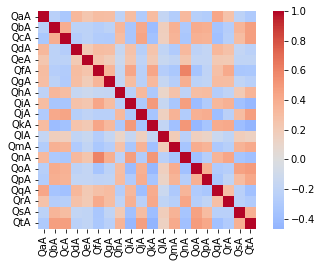

In [10]:
correlations = eda_train[answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

b(+)를 기준으로 빨간색(양의 상관관계)이면, 똑같이 +이고, 파란색(음의 상관관계)이면, 반대로 - 라고 생각할 수 있음.\
Secret인 질문 8개 중(a, d, g, i, l, n, p, t), 파란색(-)인 것은 a, d, g, i, n이고, 빨간색(+)인 것은 l, p, t이다.

마키아벨리아니즘 테스트 스코어는 - 부호를 가진 문항들의 답변값을 reverse 시키고 모든 문항의 답변들의 평균을 구한 것입니다.

\- 부호 : a, d, e, f, g, i, k, n, q, r

### 3-3. (-) 부호 질문들 reverse 

In [11]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    eda_train[flip] = 6 - eda_train[flip]

<AxesSubplot:>

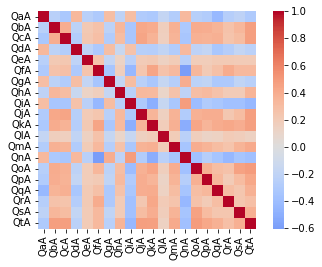

In [12]:
correlations = eda_train[answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

### 3-4. Secret 질문 reverse 

In [13]:
flipping_columns2 = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_columns2: 
    eda_train[flip] = 6 - eda_train[flip] # 0-5이므로, 6-6하면 0

<AxesSubplot:>

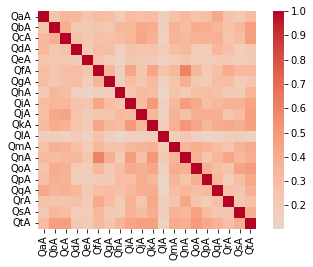

In [14]:
correlations = eda_train[answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

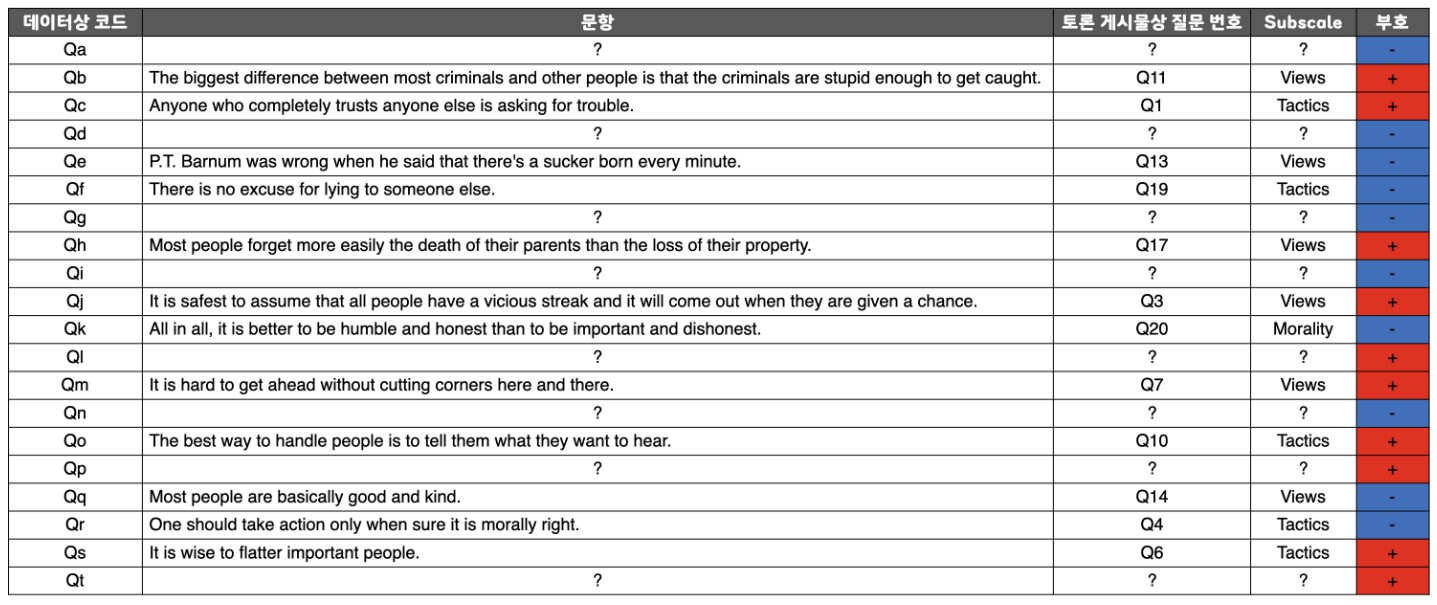

In [15]:
Image("MACH-4-all.jpg")

### 3-5. 마키아벨리니즘 score 구하기

In [16]:
eda_train["MACH-4"] = eda_train[answers].mean(axis = 1)

In [17]:
eda_train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,MACH-4
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,...,1,0,1,1,0,1,0,1,1,2.95
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,...,1,0,1,1,0,1,0,1,1,2.60
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,...,1,0,1,1,1,1,0,1,1,1.90
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,...,0,0,0,1,0,1,0,1,1,3.35
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,...,1,1,1,1,0,1,1,1,1,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,4.0,1050,5.0,619,4.0,328,5.0,285,5.0,...,1,0,1,1,1,1,0,1,1,4.15
45528,45528,4.0,581,3.0,1353,4.0,1164,5.0,798,3.0,...,1,0,1,1,1,1,0,1,1,3.80
45529,45529,2.0,593,1.0,857,1.0,1047,2.0,1515,1.0,...,1,0,1,1,0,1,0,1,1,1.50
45530,45530,5.0,747,3.0,1331,4.0,892,4.0,1281,5.0,...,1,0,1,1,1,1,0,1,1,2.90


In [18]:
eda_train['MACH-4'].describe()

count    45532.000000
mean         3.352474
std          0.794661
min          1.000000
25%          2.750000
50%          3.350000
75%          3.950000
max          5.000000
Name: MACH-4, dtype: float64

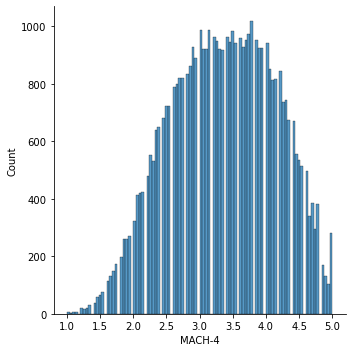

In [19]:
sns.displot(eda_train, x="MACH-4", bins=100)

In [20]:
questions = [i for i in list(ascii_lowercase)[:20]] # a~t
eda_train['delay'] = eda_train[[('Q'+i+'E') for i in questions]].sum(axis=1) # QaE ~ QtE

In [21]:
# sns.displot(eda_train['delay'], rug = True)

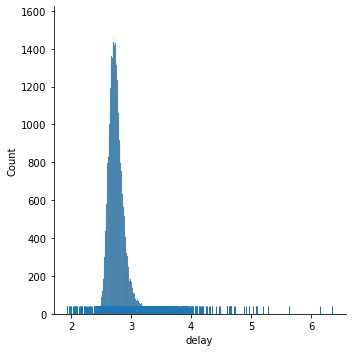

In [22]:
eda_train['delay'] = eda_train['delay'] ** (1/10) # delay column 분포를 고르게 해주기 위해 10승 루트
sns.displot(eda_train['delay'], rug = True)

# 4. 나머지 데이터 살펴보기 

In [23]:
voted = eda_train[eda_train['voted']==1]
unvoted = eda_train[eda_train['voted']==2]

<AxesSubplot:xlabel='age_group', ylabel='count'>

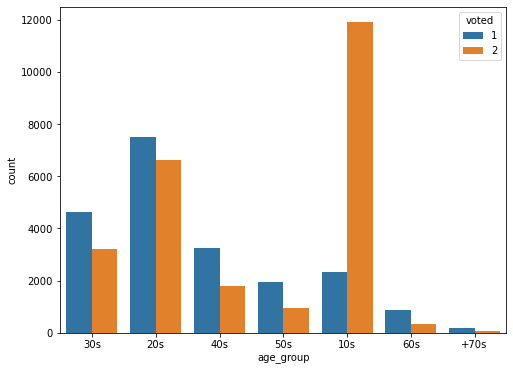

In [24]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'age_group', hue = eda_train['voted'])

<AxesSubplot:xlabel='education', ylabel='count'>

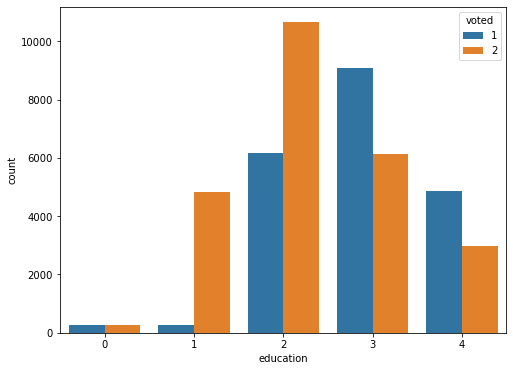

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'education', hue = eda_train['voted'])

<AxesSubplot:xlabel='engnat', ylabel='count'>

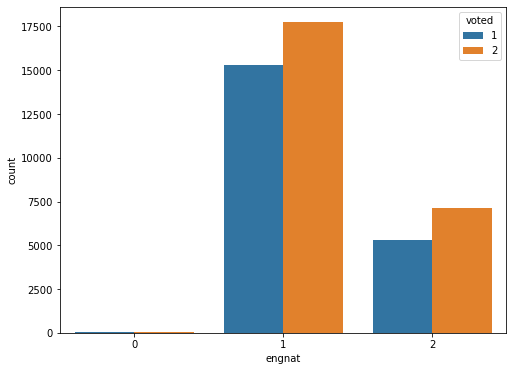

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'engnat', hue = eda_train['voted'])

<AxesSubplot:xlabel='familysize', ylabel='count'>

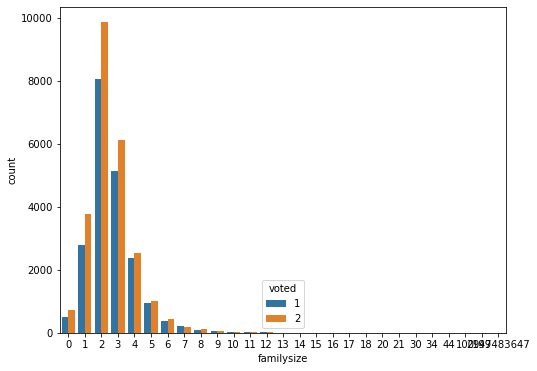

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'familysize', hue = eda_train['voted'])

<AxesSubplot:xlabel='gender', ylabel='count'>

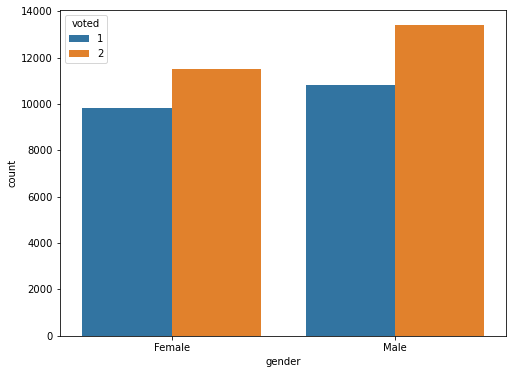

In [28]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'gender', hue = eda_train['voted'])

<AxesSubplot:xlabel='hand', ylabel='count'>

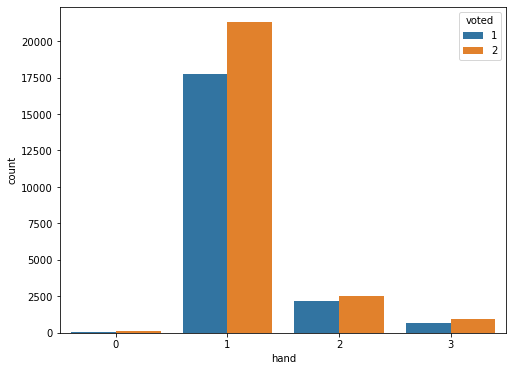

In [29]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'hand', hue = eda_train['voted'])

<AxesSubplot:xlabel='married', ylabel='count'>

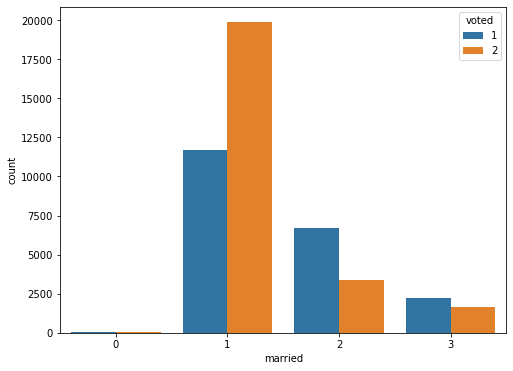

In [30]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'married', hue = eda_train['voted'])

<AxesSubplot:xlabel='race', ylabel='count'>

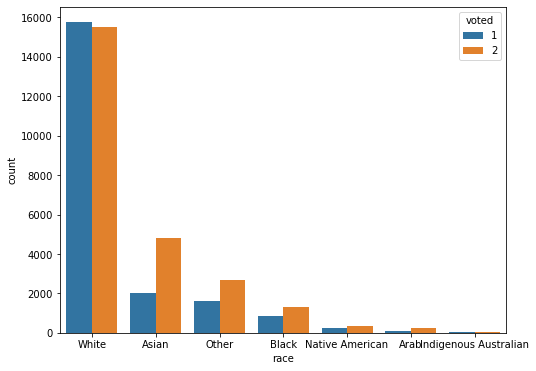

In [31]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'race', hue = eda_train['voted'])

<AxesSubplot:xlabel='religion', ylabel='count'>

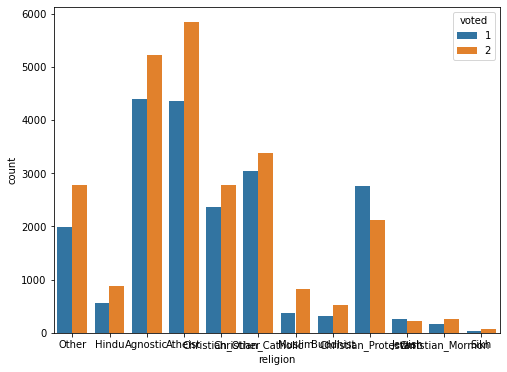

In [32]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'religion', hue = eda_train['voted'])

<AxesSubplot:xlabel='urban', ylabel='count'>

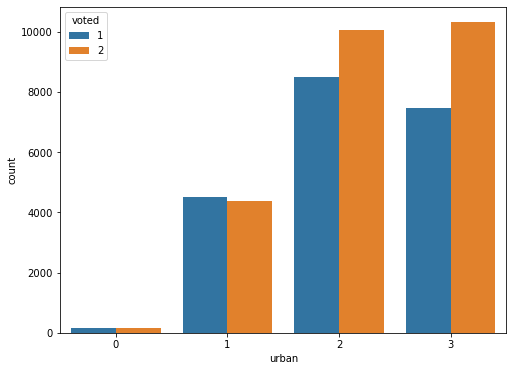

In [33]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'urban', hue = eda_train['voted'])

# 5. Feature Engineering 

In [34]:
x_train = train.copy()
x_train.drop('voted', axis=1, inplace = True)
y_train = train['voted']

In [35]:
dataset = [x_train, test]

In [36]:
x_train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1


In [37]:
y_train

0        2
1        2
2        1
3        1
4        1
        ..
45527    2
45528    2
45529    1
45530    1
45531    1
Name: voted, Length: 45532, dtype: int64

In [38]:
dataset

[       index  QaA   QaE  QbA   QbE  QcA   QcE  QdA   QdE  QeA  ...  wr_04  \
 0          0  3.0   363  4.0  1370  5.0   997  1.0  1024  2.0  ...      0   
 1          1  5.0   647  5.0  1313  3.0  3387  5.0  2969  1.0  ...      1   
 2          2  4.0  1623  1.0  1480  1.0  1021  4.0  3374  5.0  ...      1   
 3          3  3.0   504  3.0  2311  4.0   992  3.0  3245  1.0  ...      0   
 4          4  1.0   927  1.0   707  5.0   556  2.0  1062  1.0  ...      1   
 ...      ...  ...   ...  ...   ...  ...   ...  ...   ...  ...  ...    ...   
 45527  45527  2.0  1050  5.0   619  4.0   328  1.0   285  1.0  ...      1   
 45528  45528  2.0   581  3.0  1353  4.0  1164  1.0   798  3.0  ...      1   
 45529  45529  4.0   593  1.0   857  1.0  1047  4.0  1515  5.0  ...      1   
 45530  45530  1.0   747  3.0  1331  4.0   892  2.0  1281  1.0  ...      1   
 45531  45531  3.0   496  5.0  1827  5.0   754  3.0  1117  1.0  ...      1   
 
        wr_05  wr_06  wr_07  wr_08  wr_09  wr_10  wr_11  wr_12

### 5-1. MACH-4 FE 

In [39]:
questions = [i for i in list(ascii_lowercase)[:20]] # a~t
answers = [('Q'+i+'A') for i in questions] # QaA ~ QtA

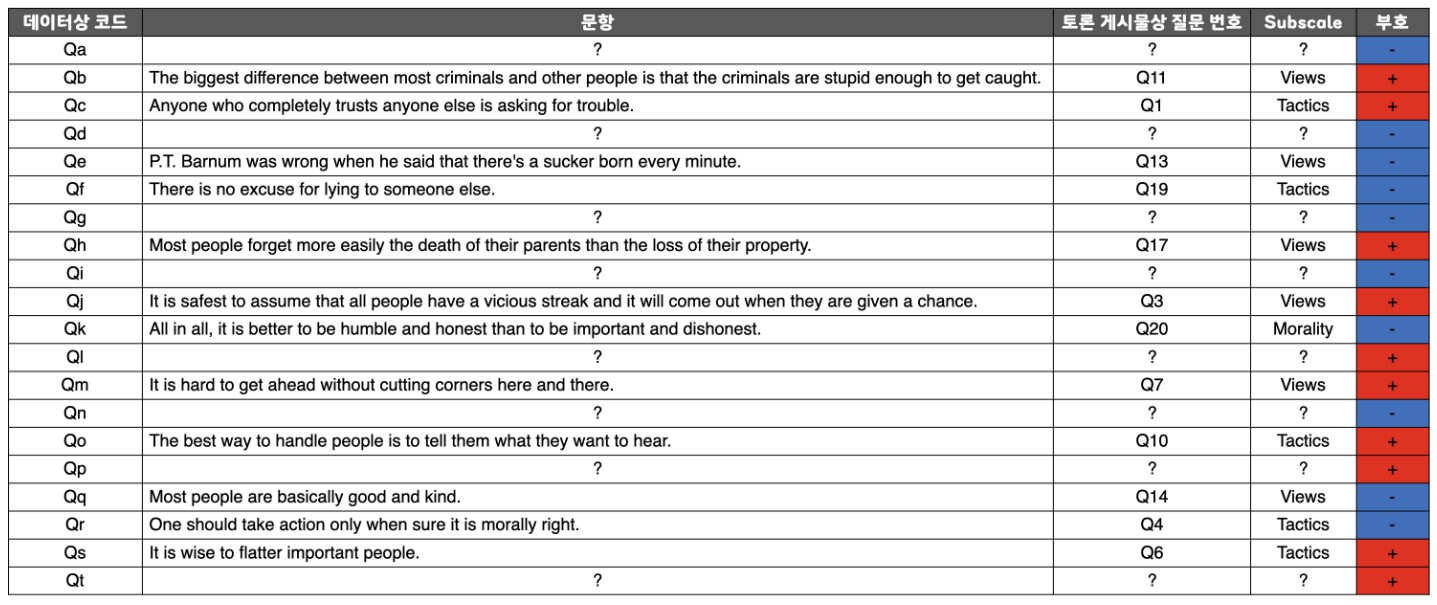

In [40]:
Image("MACH-4-all.jpg")

In [41]:
for data in dataset:
    data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
    data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
    data['M'] = - data['QkA']

In [42]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"] # (-) 부호 특징들 flipping
for data in dataset:
    for flip in flipping_columns: 
        data[flip] = 6 - data[flip]

In [43]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"] # secret중, (-) 부호 특징들 flipping
for data in dataset:
    for flip in flipping_secret_columns: 
        data[flip] = 6 - data[flip]

In [44]:
for data in dataset:
    data['Mach_score'] = data[answers].mean(axis = 1)

In [45]:
for data in dataset:
    data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
    data['delay'] = data['delay'] ** (1/10)
    data['delay_var'] = data['delay'].var()

In [46]:
dataset[0]

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_10,wr_11,wr_12,wr_13,T,V,M,Mach_score,delay,delay_var
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,...,1,0,1,1,2.0,10.0,-4.0,2.95,2.662087,0.02758
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,...,1,0,1,1,4.0,4.0,-5.0,2.60,2.947932,0.02758
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,...,1,0,1,1,-1.0,-4.0,-5.0,1.90,2.800390,0.02758
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,...,1,0,1,1,6.0,10.0,-3.0,3.35,3.063104,0.02758
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,...,1,1,1,1,0.0,5.0,-5.0,3.00,2.671078,0.02758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,4.0,1050,5.0,619,4.0,328,5.0,285,5.0,...,1,0,1,1,9.0,11.0,-4.0,4.15,2.580244,0.02758
45528,45528,4.0,581,3.0,1353,4.0,1164,5.0,798,3.0,...,1,0,1,1,7.0,7.0,-2.0,3.80,2.764092,0.02758
45529,45529,2.0,593,1.0,857,1.0,1047,2.0,1515,1.0,...,1,0,1,1,-4.0,-6.0,-5.0,1.50,2.757589,0.02758
45530,45530,5.0,747,3.0,1331,4.0,892,4.0,1281,5.0,...,1,0,1,1,4.0,4.0,-5.0,2.90,2.737949,0.02758


In [47]:
dataset[1]

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_10,wr_11,wr_12,wr_13,T,V,M,Mach_score,delay,delay_var
0,0,3.0,736,2.0,2941,3.0,4621,5.0,4857,4.0,...,1,0,1,1,-1.0,4.0,-5.0,2.45,2.968540,0.028746
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,2.0,...,0,0,0,0,2.0,1.0,-5.0,2.80,2.756045,0.028746
2,2,3.0,500,2.0,2507,4.0,480,4.0,614,4.0,...,1,0,1,1,6.0,6.0,-4.0,3.55,2.754975,0.028746
3,3,5.0,669,1.0,1050,5.0,1435,4.0,2252,1.0,...,1,1,1,1,9.0,-3.0,-3.0,3.35,2.766450,0.028746
4,4,4.0,499,1.0,1243,5.0,845,4.0,1666,4.0,...,1,1,1,1,5.0,2.0,-5.0,2.90,2.673983,0.028746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,1.0,427,5.0,1066,5.0,588,5.0,560,4.0,...,1,0,1,1,7.0,6.0,-4.0,3.20,2.644299,0.028746
11379,11379,5.0,314,5.0,554,5.0,230,5.0,956,4.0,...,1,1,1,1,12.0,11.0,-1.0,4.55,2.578840,0.028746
11380,11380,5.0,627,2.0,799,1.0,739,4.0,1123,5.0,...,1,0,1,1,3.0,7.0,-4.0,3.15,2.636346,0.028746
11381,11381,4.0,539,1.0,2090,2.0,4642,5.0,673,4.0,...,1,1,1,0,6.0,-1.0,-3.0,3.05,2.863642,0.028746


In [48]:
Ancoms = list(combinations(answers, 2))
Ancoms

[('QaA', 'QbA'),
 ('QaA', 'QcA'),
 ('QaA', 'QdA'),
 ('QaA', 'QeA'),
 ('QaA', 'QfA'),
 ('QaA', 'QgA'),
 ('QaA', 'QhA'),
 ('QaA', 'QiA'),
 ('QaA', 'QjA'),
 ('QaA', 'QkA'),
 ('QaA', 'QlA'),
 ('QaA', 'QmA'),
 ('QaA', 'QnA'),
 ('QaA', 'QoA'),
 ('QaA', 'QpA'),
 ('QaA', 'QqA'),
 ('QaA', 'QrA'),
 ('QaA', 'QsA'),
 ('QaA', 'QtA'),
 ('QbA', 'QcA'),
 ('QbA', 'QdA'),
 ('QbA', 'QeA'),
 ('QbA', 'QfA'),
 ('QbA', 'QgA'),
 ('QbA', 'QhA'),
 ('QbA', 'QiA'),
 ('QbA', 'QjA'),
 ('QbA', 'QkA'),
 ('QbA', 'QlA'),
 ('QbA', 'QmA'),
 ('QbA', 'QnA'),
 ('QbA', 'QoA'),
 ('QbA', 'QpA'),
 ('QbA', 'QqA'),
 ('QbA', 'QrA'),
 ('QbA', 'QsA'),
 ('QbA', 'QtA'),
 ('QcA', 'QdA'),
 ('QcA', 'QeA'),
 ('QcA', 'QfA'),
 ('QcA', 'QgA'),
 ('QcA', 'QhA'),
 ('QcA', 'QiA'),
 ('QcA', 'QjA'),
 ('QcA', 'QkA'),
 ('QcA', 'QlA'),
 ('QcA', 'QmA'),
 ('QcA', 'QnA'),
 ('QcA', 'QoA'),
 ('QcA', 'QpA'),
 ('QcA', 'QqA'),
 ('QcA', 'QrA'),
 ('QcA', 'QsA'),
 ('QcA', 'QtA'),
 ('QdA', 'QeA'),
 ('QdA', 'QfA'),
 ('QdA', 'QgA'),
 ('QdA', 'QhA'),
 ('QdA', 'QiA'

In [49]:
for data in dataset:
    for a,b in Ancoms:
        data['mach%s_dv_%s'%(a,b)] = data[a]/data[b]

In [50]:
dataset[0]

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,machQpA_dv_QqA,machQpA_dv_QrA,machQpA_dv_QsA,machQpA_dv_QtA,machQqA_dv_QrA,machQqA_dv_QsA,machQqA_dv_QtA,machQrA_dv_QsA,machQrA_dv_QtA,machQsA_dv_QtA
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,...,0.500000,0.500000,1.000000,2.0,1.000000,2.000000,4.0,2.000000,4.00,2.00
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,...,5.000000,1.000000,1.250000,5.0,0.200000,0.250000,1.0,1.250000,5.00,4.00
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,...,1.000000,0.500000,1.000000,1.0,0.500000,1.000000,1.0,2.000000,2.00,1.00
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,...,1.333333,2.000000,1.000000,0.8,1.500000,0.750000,0.6,0.500000,0.40,0.80
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,...,4.000000,4.000000,4.000000,2.0,1.000000,1.000000,0.5,1.000000,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,4.0,1050,5.0,619,4.0,328,5.0,285,5.0,...,1.000000,0.800000,0.800000,1.0,0.800000,0.800000,1.0,1.000000,1.25,1.25
45528,45528,4.0,581,3.0,1353,4.0,1164,5.0,798,3.0,...,1.000000,1.333333,1.000000,1.0,1.333333,1.000000,1.0,0.750000,0.75,1.00
45529,45529,2.0,593,1.0,857,1.0,1047,2.0,1515,1.0,...,1.000000,1.000000,0.333333,1.0,1.000000,0.333333,1.0,0.333333,1.00,3.00
45530,45530,5.0,747,3.0,1331,4.0,892,4.0,1281,5.0,...,0.500000,0.500000,0.250000,1.0,1.000000,0.500000,2.0,0.500000,2.00,4.00


In [51]:
dataset[1]

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,machQpA_dv_QqA,machQpA_dv_QrA,machQpA_dv_QsA,machQpA_dv_QtA,machQqA_dv_QrA,machQqA_dv_QsA,machQqA_dv_QtA,machQrA_dv_QsA,machQrA_dv_QtA,machQsA_dv_QtA
0,0,3.0,736,2.0,2941,3.0,4621,5.0,4857,4.0,...,1.333333,2.00,4.00,2.000000,1.5,3.000000,1.50,2.000000,1.000000,0.500000
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,2.0,...,1.500000,3.00,1.00,0.750000,2.0,0.666667,0.50,0.333333,0.250000,0.750000
2,2,3.0,500,2.0,2507,4.0,480,4.0,614,4.0,...,1.000000,1.50,1.00,0.600000,1.5,1.000000,0.60,0.666667,0.400000,0.600000
3,3,5.0,669,1.0,1050,5.0,1435,4.0,2252,1.0,...,4.000000,0.80,1.00,4.000000,0.2,0.250000,1.00,1.250000,5.000000,4.000000
4,4,4.0,499,1.0,1243,5.0,845,4.0,1666,4.0,...,1.333333,2.00,1.00,1.333333,1.5,0.750000,1.00,0.500000,0.666667,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,1.0,427,5.0,1066,5.0,588,5.0,560,4.0,...,1.000000,0.50,1.00,0.500000,0.5,1.000000,0.50,2.000000,1.000000,0.500000
11379,11379,5.0,314,5.0,554,5.0,230,5.0,956,4.0,...,1.666667,1.00,1.00,1.250000,0.6,0.600000,0.75,1.000000,1.250000,1.250000
11380,11380,5.0,627,2.0,799,1.0,739,4.0,1123,5.0,...,0.500000,0.50,0.50,1.000000,1.0,1.000000,2.00,1.000000,2.000000,2.000000
11381,11381,4.0,539,1.0,2090,2.0,4642,5.0,673,4.0,...,0.500000,0.25,0.25,0.500000,0.5,0.500000,1.00,1.000000,2.000000,2.000000


In [52]:
for data in dataset:
    data['mach_var'] = data[answers].var(axis=1)

In [53]:
for data in dataset:
    data.drop([('Q'+i+'A') for i in questions], axis = 1, inplace = True)
    data.drop([('Q'+i+'E') for i in questions], axis = 1, inplace = True)

In [54]:
dataset[0]

,index,age_group,education,engnat,familysize,gender,hand,married,race,religion,...,machQpA_dv_QrA,machQpA_dv_QsA,machQpA_dv_QtA,machQqA_dv_QrA,machQqA_dv_QsA,machQqA_dv_QtA,machQrA_dv_QsA,machQrA_dv_QtA,machQsA_dv_QtA,mach_var
0,0,30s,2,1,4,Female,1,3,White,Other,...,0.500000,1.000000,2.0,1.000000,2.000000,4.0,2.000000,4.00,2.00,1.944737
1,1,20s,4,2,3,Female,1,1,Asian,Hindu,...,1.000000,1.250000,5.0,0.200000,0.250000,1.0,1.250000,5.00,4.00,3.094737
2,2,30s,3,1,3,Male,1,2,White,Other,...,0.500000,1.000000,1.0,0.500000,1.000000,1.0,2.000000,2.00,1.00,1.463158
3,3,20s,4,2,0,Female,1,1,Asian,Hindu,...,2.000000,1.000000,0.8,1.500000,0.750000,0.6,0.500000,0.40,0.80,1.081579
4,4,20s,3,1,2,Male,1,2,White,Agnostic,...,4.000000,4.000000,2.0,1.000000,1.000000,0.5,1.000000,0.50,0.50,3.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,10s,2,1,1,Female,3,1,White,Jewish,...,0.800000,0.800000,1.0,0.800000,0.800000,1.0,1.000000,1.25,1.25,1.397368
45528,45528,30s,2,1,2,Male,1,1,White,Atheist,...,1.333333,1.000000,1.0,1.333333,1.000000,1.0,0.750000,0.75,1.00,0.800000
45529,45529,10s,2,1,1,Female,1,1,White,Christian_Other,...,1.000000,0.333333,1.0,1.000000,0.333333,1.0,0.333333,1.00,3.00,1.000000
45530,45530,40s,4,1,2,Male,3,1,White,Atheist,...,0.500000,0.250000,1.0,1.000000,0.500000,2.0,0.500000,2.00,4.00,2.831579


In [55]:
dataset[1]

,index,age_group,education,engnat,familysize,gender,hand,married,race,religion,...,machQpA_dv_QrA,machQpA_dv_QsA,machQpA_dv_QtA,machQqA_dv_QrA,machQqA_dv_QsA,machQqA_dv_QtA,machQrA_dv_QsA,machQrA_dv_QtA,machQsA_dv_QtA,mach_var
0,0,10s,2,2,3,Male,1,1,White,Christian_Protestant,...,2.00,4.00,2.000000,1.5,3.000000,1.50,2.000000,1.000000,0.500000,1.207895
1,1,10s,2,2,2,Male,2,1,Other,Christian_Catholic,...,3.00,1.00,0.750000,2.0,0.666667,0.50,0.333333,0.250000,0.750000,1.747368
2,2,30s,3,2,7,Male,1,2,Other,Christian_Other,...,1.50,1.00,0.600000,1.5,1.000000,0.60,0.666667,0.400000,0.600000,1.313158
3,3,60s,4,1,4,Male,1,2,White,Christian_Catholic,...,0.80,1.00,4.000000,0.2,0.250000,1.00,1.250000,5.000000,4.000000,3.081579
4,4,10s,2,1,3,Male,1,1,White,Agnostic,...,2.00,1.00,1.333333,1.5,0.750000,1.00,0.500000,0.666667,1.333333,1.673684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,20s,3,2,3,Female,1,1,Other,Christian_Catholic,...,0.50,1.00,0.500000,0.5,1.000000,0.50,2.000000,1.000000,0.500000,1.852632
11379,11379,10s,2,2,1,Female,1,1,Asian,Agnostic,...,1.00,1.00,1.250000,0.6,0.600000,0.75,1.000000,1.250000,1.250000,0.997368
11380,11380,30s,4,1,4,Male,1,2,White,Atheist,...,0.50,0.50,1.000000,1.0,1.000000,2.00,1.000000,2.000000,2.000000,1.502632
11381,11381,40s,2,1,3,Female,1,2,White,Atheist,...,0.25,0.25,0.500000,0.5,0.500000,1.00,1.000000,2.000000,2.000000,2.365789


### 5-2. Other Features FE

In [56]:
for data in dataset:
    data.drop('hand', axis=1, inplace = True)

- 총 78개의 컬럼
- 0 : index -->삭제 예정
- 1-40 : Q_A (a-t) - 질문에 대한 답변 (1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree), Q_E (a-t) - 질문을 답할 때 까지의 시간
- 41 : age_group - 연령
- 42 : education - 교육 수준 (1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답)
- 43 : engnat - 모국어가 영어 (1=Yes, 2=No, 0=무응답)
- 44: familysize - 형제자매 수
- 45 : gender - 성별(Male, Female) **--> 0 / 1로 바꿀 예정**
- 46 : hand - 필기하는 손 (1=Right, 2=Left, 3=Both, 0=무응답)
- 47 : married  - 혼인 상태 (1=Never married, 2=Currently married, 3=Previously married, 0=Other)
- 48 : race - 인종 (Asian, Arab, Black, Indigenous Australian, Native American, White, Other) **---> 원-핫 인코딩으로 변환 예정?**
- 49 : religion - 종교 (Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other) **---> 원-핫 인코딩으로 변환 예정?**
- 50-59 : tp_(01-10) - 본인에 대한 평가?
- 60 : urban - 유년기의 거주 구역 (1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답)
- 61 : voted - 지난 해 국가 선거 투표 여부 (1=Yes, 2=No) **--> 타겟**
- 62-64 : wf__(01~03) - 허구인 단어의 정의 정의를 앎(1=Yes, 0=No)
- 65-64 : wr__(01~13) - 실존하는 해당 단어의 정의를 앎 (1=Yes, 0=No)
- NULL값 없음. age_group, gender, race, religion 컬럼 제외하고는 전부 수치형

In [57]:
wr_list = [('wr_0'+str(i)) for i in range(1,10)] # wr_01~09
wr_list

['wr_01',
 'wr_02',
 'wr_03',
 'wr_04',
 'wr_05',
 'wr_06',
 'wr_07',
 'wr_08',
 'wr_09']

In [58]:
wr_list.extend([('wr_'+str(i)) for i in range(10,14)]) # wr_10~13
wr_list

['wr_01',
 'wr_02',
 'wr_03',
 'wr_04',
 'wr_05',
 'wr_06',
 'wr_07',
 'wr_08',
 'wr_09',
 'wr_10',
 'wr_11',
 'wr_12',
 'wr_13']

In [59]:
dataset[0][wr_list]

,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,0,1,0,1,1,0,1,1,0,1,0,1,1
2,1,1,0,1,1,0,1,1,1,1,0,1,1
3,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,1,1,0,1,1,0,1,1,1,1,0,1,1


In [60]:
dataset[1][wr_list]

,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,1,1,0,1,0,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,1,1,0,1,1,0,1,1,0,1,0,1,1
11379,1,1,1,1,1,1,1,1,1,1,1,1,1
11380,1,1,1,1,1,0,1,1,0,1,0,1,1
11381,1,1,0,1,0,0,1,1,0,1,1,1,0


In [61]:
dataset[0]['tp01']

0        2
1        1
2        2
3        2
4        1
        ..
45527    1
45528    2
45529    4
45530    1
45531    3
Name: tp01, Length: 45532, dtype: int64

wr_(01~13) : 실존하는 해당 단어의 정의을 앎\
wf_(01~03) : 허구인 단어의 정의를 앎

위 두 컬럼은 마키아벨리즘 테스트지와는 별개로 진행된 질문지일까요? 해당 컬럼의 정확한 영문명이나 질문지 등 자세한 정보를 확인할 수  있는지 궁금합니다.

DACON.ZERO\
2020.10.26 16:10\
동시에 진행된 질문지입니다.

데이터 출처페이지 openpsychometrics.org에서 기존 데이터의 자세한 컬럼 설명을 확인할 수 있습니다.

데이콘에서 제작해서 제공한 데이터는 해당 데이터를 문제화 한 것으로 기존의 데이터와 다릅니다.

감사합니다.

openpsychometrics.org

In [62]:
wr_no_need = [i for i in wr_list if i not in ['wr_01', 'wr_03', 'wr_06', 'wr_09', 'wr_11']] # 왜 이게 필요없는지 모르겠음?

In [63]:
wr_no_need

['wr_02', 'wr_04', 'wr_05', 'wr_07', 'wr_08', 'wr_10', 'wr_12', 'wr_13']

In [64]:
for data in dataset:
    data.drop(wr_no_need, axis=1, inplace = True)

tp__(01~07) : items were rated "I see myself as:" _____ such that
- tp01 : Extraverted, enthusiastic.
- tp02 : Critical, quarrelsome.
- tp03 : Dependable, self-disciplined.
- tp04 : Anxious, easily upset.
- tp05 : Open to new experiences, complex.
- tp06 : Reserved, quiet.
- tp07 : Sympathetic, warm.
- tp08 : Disorganized, careless.
- tp09 : Calm, emotionally stable.
- tp10 : Conventional, uncreative.

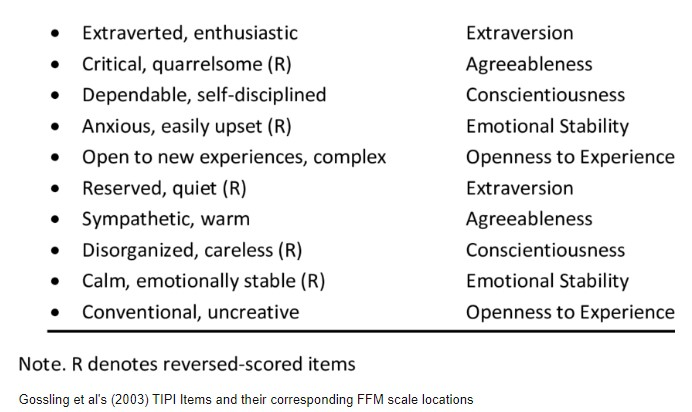

In [65]:
Image("TIPI.jpg")

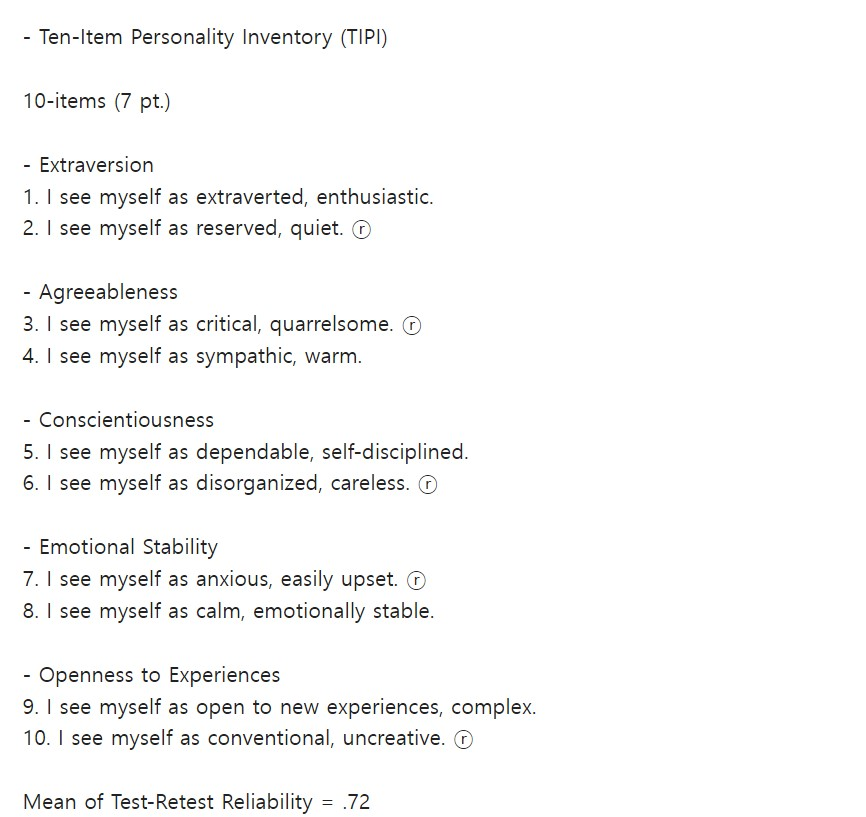

In [66]:
Image("TIPI2.jpg")

https://m.cafe.daum.net/cauadsp/U71N/1?listURI=%2Fcauadsp%2FU71N

In [67]:
tps = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10']
for data in dataset:
    for tp in tps:
        data[tp] = 7 - data[tp]

In [68]:
for data in dataset:
    for tp in tps:
        data[tp] = data[tp].replace(0, np.nan)
        mean = data[tp].mean(axis=0)
        data[tp] = data[tp].replace(np.nan , mean)

In [69]:
# TIPI test에 따라 feature 항목을 나눠놓았는데, 이때는 tipi feature들이 flip된 형태로 저장되어있는지 몰라서 따로 전처리를 해주지 않았었습니다.
for data in dataset:
    data['Ex'] = data['tp01']-data['tp06'] # 외향성
    data['Ag'] = data['tp07']-data['tp02'] # 우호성
    data['Con'] = data['tp03']-data['tp08'] # 성실성
    data['Es'] =data['tp09']-data['tp04'] # 신경증
    data['Op'] =data['tp05']-data['tp10'] # 개방성

In [70]:
dataset[0]

,index,age_group,education,engnat,familysize,gender,married,race,religion,tp01,...,machQqA_dv_QtA,machQrA_dv_QsA,machQrA_dv_QtA,machQsA_dv_QtA,mach_var,Ex,Ag,Con,Es,Op
0,0,30s,2,1,4,Female,3,White,Other,5.0,...,4.0,2.000000,4.00,2.00,1.944737,-1.0,0.005952,2.0,-3.0,1.0
1,1,20s,4,2,3,Female,1,Asian,Hindu,6.0,...,1.0,1.250000,5.00,4.00,3.094737,1.0,-2.000000,4.0,0.0,3.0
2,2,30s,3,1,3,Male,2,White,Other,5.0,...,1.0,2.000000,2.00,1.00,1.463158,2.0,1.000000,5.0,4.0,0.0
3,3,20s,4,2,0,Female,1,Asian,Hindu,5.0,...,0.6,0.500000,0.40,0.80,1.081579,1.0,3.000000,2.0,0.0,2.0
4,4,20s,3,1,2,Male,2,White,Agnostic,6.0,...,0.5,1.000000,0.50,0.50,3.263158,1.0,1.000000,5.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,10s,2,1,1,Female,1,White,Jewish,6.0,...,1.0,1.000000,1.25,1.25,1.397368,5.0,-1.000000,-6.0,-5.0,2.0
45528,45528,30s,2,1,2,Male,1,White,Atheist,5.0,...,1.0,0.750000,0.75,1.00,0.800000,1.0,-1.000000,2.0,2.0,4.0
45529,45529,10s,2,1,1,Female,1,White,Christian_Other,3.0,...,1.0,0.333333,1.00,3.00,1.000000,-3.0,4.000000,0.0,3.0,6.0
45530,45530,40s,4,1,2,Male,1,White,Atheist,6.0,...,2.0,0.500000,2.00,4.00,2.831579,0.0,-1.000000,2.0,2.0,4.0


In [71]:
dataset[1]

,index,age_group,education,engnat,familysize,gender,married,race,religion,tp01,...,machQqA_dv_QtA,machQrA_dv_QsA,machQrA_dv_QtA,machQsA_dv_QtA,mach_var,Ex,Ag,Con,Es,Op
0,0,10s,2,2,3,Male,1,White,Christian_Protestant,5.000000,...,1.50,2.000000,1.000000,0.500000,1.207895,0.000000,-1.000000,2.000000,0.000000,3.000000
1,1,10s,2,2,2,Male,1,Other,Christian_Catholic,4.029243,...,0.50,0.333333,0.250000,0.750000,1.747368,-0.552675,0.581504,1.755357,0.732614,3.006495
2,2,30s,3,2,7,Male,2,Other,Christian_Other,1.000000,...,0.60,0.666667,0.400000,0.600000,1.313158,-5.000000,0.000000,-1.000000,-4.000000,-5.000000
3,3,60s,4,1,4,Male,2,White,Christian_Catholic,7.000000,...,1.00,1.250000,5.000000,4.000000,3.081579,6.000000,5.000000,4.000000,5.000000,6.000000
4,4,10s,2,1,3,Male,1,White,Agnostic,1.000000,...,1.00,0.500000,0.666667,1.333333,1.673684,-6.000000,-4.000000,0.000000,-2.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,20s,3,2,3,Female,1,Other,Christian_Catholic,6.000000,...,0.50,2.000000,1.000000,0.500000,1.852632,3.000000,-1.000000,0.000000,-1.000000,5.000000
11379,11379,10s,2,2,1,Female,1,Asian,Agnostic,5.000000,...,0.75,1.000000,1.250000,1.250000,0.997368,4.000000,0.000000,-2.000000,-6.000000,4.000000
11380,11380,30s,4,1,4,Male,2,White,Atheist,3.000000,...,2.00,1.000000,2.000000,2.000000,1.502632,-2.000000,1.000000,5.000000,6.000000,4.000000
11381,11381,40s,2,1,3,Female,2,White,Atheist,3.000000,...,1.00,1.000000,2.000000,2.000000,2.365789,-2.000000,5.000000,5.000000,5.000000,5.000000


In [72]:
index = test['index']
for data in dataset:
    data.drop('index', axis = 1, inplace = True)

In [73]:
dataset[0]

,age_group,education,engnat,familysize,gender,married,race,religion,tp01,tp02,...,machQqA_dv_QtA,machQrA_dv_QsA,machQrA_dv_QtA,machQsA_dv_QtA,mach_var,Ex,Ag,Con,Es,Op
0,30s,2,1,4,Female,3,White,Other,5.0,5.0,...,4.0,2.000000,4.00,2.00,1.944737,-1.0,0.005952,2.0,-3.0,1.0
1,20s,4,2,3,Female,1,Asian,Hindu,6.0,6.0,...,1.0,1.250000,5.00,4.00,3.094737,1.0,-2.000000,4.0,0.0,3.0
2,30s,3,1,3,Male,2,White,Other,5.0,4.0,...,1.0,2.000000,2.00,1.00,1.463158,2.0,1.000000,5.0,4.0,0.0
3,20s,4,2,0,Female,1,Asian,Hindu,5.0,3.0,...,0.6,0.500000,0.40,0.80,1.081579,1.0,3.000000,2.0,0.0,2.0
4,20s,3,1,2,Male,2,White,Agnostic,6.0,6.0,...,0.5,1.000000,0.50,0.50,3.263158,1.0,1.000000,5.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,10s,2,1,1,Female,1,White,Jewish,6.0,5.0,...,1.0,1.000000,1.25,1.25,1.397368,5.0,-1.000000,-6.0,-5.0,2.0
45528,30s,2,1,2,Male,1,White,Atheist,5.0,5.0,...,1.0,0.750000,0.75,1.00,0.800000,1.0,-1.000000,2.0,2.0,4.0
45529,10s,2,1,1,Female,1,White,Christian_Other,3.0,3.0,...,1.0,0.333333,1.00,3.00,1.000000,-3.0,4.000000,0.0,3.0,6.0
45530,40s,4,1,2,Male,1,White,Atheist,6.0,5.0,...,2.0,0.500000,2.00,4.00,2.831579,0.0,-1.000000,2.0,2.0,4.0


In [74]:
dataset[1]

,age_group,education,engnat,familysize,gender,married,race,religion,tp01,tp02,...,machQqA_dv_QtA,machQrA_dv_QsA,machQrA_dv_QtA,machQsA_dv_QtA,mach_var,Ex,Ag,Con,Es,Op
0,10s,2,2,3,Male,1,White,Christian_Protestant,5.000000,6.000000,...,1.50,2.000000,1.000000,0.500000,1.207895,0.000000,-1.000000,2.000000,0.000000,3.000000
1,10s,2,2,2,Male,1,Other,Christian_Catholic,4.029243,4.418319,...,0.50,0.333333,0.250000,0.750000,1.747368,-0.552675,0.581504,1.755357,0.732614,3.006495
2,30s,3,2,7,Male,2,Other,Christian_Other,1.000000,5.000000,...,0.60,0.666667,0.400000,0.600000,1.313158,-5.000000,0.000000,-1.000000,-4.000000,-5.000000
3,60s,4,1,4,Male,2,White,Christian_Catholic,7.000000,2.000000,...,1.00,1.250000,5.000000,4.000000,3.081579,6.000000,5.000000,4.000000,5.000000,6.000000
4,10s,2,1,3,Male,1,White,Agnostic,1.000000,6.000000,...,1.00,0.500000,0.666667,1.333333,1.673684,-6.000000,-4.000000,0.000000,-2.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,20s,3,2,3,Female,1,Other,Christian_Catholic,6.000000,7.000000,...,0.50,2.000000,1.000000,0.500000,1.852632,3.000000,-1.000000,0.000000,-1.000000,5.000000
11379,10s,2,2,1,Female,1,Asian,Agnostic,5.000000,7.000000,...,0.75,1.000000,1.250000,1.250000,0.997368,4.000000,0.000000,-2.000000,-6.000000,4.000000
11380,30s,4,1,4,Male,2,White,Atheist,3.000000,5.000000,...,2.00,1.000000,2.000000,2.000000,1.502632,-2.000000,1.000000,5.000000,6.000000,4.000000
11381,40s,2,1,3,Female,2,White,Atheist,3.000000,1.000000,...,1.00,1.000000,2.000000,2.000000,2.365789,-2.000000,5.000000,5.000000,5.000000,5.000000


In [75]:
for data in dataset:
    teenager_ox = 1*np.array(data['age_group'] == '10s')
    data['teenager_ox'] = teenager_ox

In [76]:
tpcoms = list(combinations(tps, 2))
for data in dataset:
    for a,b in tpcoms:
        data['tp_%s_dv_%s'%(a,b)] = data[a]/data[b]

In [77]:
encoder = LabelEncoder() # 인코딩
needenco = ['age_group', 'gender', 'race', 'religion']
for i in needenco:
    x_train[i] = encoder.fit_transform(x_train[i])
    test[i] = encoder.transform(test[i])

In [78]:
x_train

,age_group,education,engnat,familysize,gender,married,race,religion,tp01,tp02,...,tp_tp06_dv_tp07,tp_tp06_dv_tp08,tp_tp06_dv_tp09,tp_tp06_dv_tp10,tp_tp07_dv_tp08,tp_tp07_dv_tp09,tp_tp07_dv_tp10,tp_tp08_dv_tp09,tp_tp08_dv_tp10,tp_tp09_dv_tp10
0,3,2,1,4,0,3,6,10,5.0,5.0,...,1.198573,2.000000,2.000000,1.500000,1.668651,1.668651,1.251488,1.000000,0.750000,0.750000
1,2,4,2,3,0,1,1,7,6.0,6.0,...,1.250000,1.666667,0.714286,1.666667,1.333333,0.571429,1.333333,0.428571,1.000000,2.333333
2,3,3,1,3,1,2,6,10,5.0,4.0,...,0.600000,3.000000,0.500000,0.750000,5.000000,0.833333,1.250000,0.166667,0.250000,1.500000
3,2,4,2,0,0,1,1,7,5.0,3.0,...,0.666667,1.000000,0.666667,1.000000,1.500000,1.000000,1.500000,0.666667,1.000000,1.500000
4,2,3,1,2,1,2,6,0,6.0,6.0,...,0.714286,5.000000,1.000000,5.000000,7.000000,1.400000,7.000000,0.200000,1.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,1,2,1,1,0,1,6,8,6.0,5.0,...,0.250000,0.142857,1.000000,0.333333,0.571429,4.000000,1.333333,7.000000,2.333333,0.333333
45528,3,2,1,2,1,1,6,1,5.0,5.0,...,1.000000,1.333333,0.666667,2.000000,1.333333,0.666667,2.000000,0.500000,1.500000,3.000000
45529,1,2,1,1,0,1,6,5,3.0,3.0,...,0.857143,1.200000,1.000000,6.000000,1.400000,1.166667,7.000000,0.833333,5.000000,6.000000
45530,4,4,1,2,1,1,6,1,6.0,5.0,...,1.500000,1.200000,1.200000,2.000000,0.800000,0.800000,1.333333,1.000000,1.666667,1.666667


In [79]:
test

,age_group,education,engnat,familysize,gender,married,race,religion,tp01,tp02,...,tp_tp06_dv_tp07,tp_tp06_dv_tp08,tp_tp06_dv_tp09,tp_tp06_dv_tp10,tp_tp07_dv_tp08,tp_tp07_dv_tp09,tp_tp07_dv_tp10,tp_tp08_dv_tp09,tp_tp08_dv_tp10,tp_tp09_dv_tp10
0,1,2,2,3,1,1,6,6,5.000000,6.000000,...,1.000000,1.250000,1.666667,1.666667,1.250000,1.666667,1.666667,1.333333,1.333333,1.000000
1,1,2,2,2,1,1,5,3,4.029243,4.418319,...,0.916416,1.305897,0.967379,1.710684,1.425005,1.055612,1.866711,0.740777,1.309968,1.768369
2,3,3,2,7,1,2,5,5,1.000000,5.000000,...,1.200000,1.200000,2.000000,1.000000,1.000000,1.666667,0.833333,1.666667,0.833333,0.500000
3,6,4,1,4,1,2,6,3,7.000000,2.000000,...,0.142857,0.500000,0.166667,1.000000,3.500000,1.166667,7.000000,0.333333,2.000000,6.000000
4,1,2,1,3,1,1,6,0,1.000000,6.000000,...,3.500000,1.400000,2.333333,1.750000,0.400000,0.666667,0.500000,1.666667,1.250000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,2,3,2,3,0,1,5,3,6.000000,7.000000,...,0.500000,0.428571,1.000000,1.500000,0.857143,2.000000,3.000000,2.333333,3.500000,1.500000
11379,1,2,2,1,0,1,1,0,5.000000,7.000000,...,0.142857,0.142857,1.000000,0.333333,1.000000,7.000000,2.333333,7.000000,2.333333,0.333333
11380,3,4,1,4,1,2,6,1,3.000000,5.000000,...,0.833333,5.000000,0.714286,2.500000,6.000000,0.857143,3.000000,0.142857,0.500000,3.500000
11381,4,2,1,3,0,2,6,1,3.000000,1.000000,...,0.833333,5.000000,0.833333,2.500000,6.000000,1.000000,3.000000,0.166667,0.500000,3.000000


In [80]:
for data in dataset:
    data['Es_gender'] = data['Es']*data['gender']
    data['Con_gender'] = data['Con']*data['gender']
    data['Op_gender'] = data['Op']*data['gender']

# 6. Model 학습 

In [81]:
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [82]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
soft_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('r1', RandomForestClassifier(n_estimators=500)),
                             ('r2', LGBMClassifier()),
                             ('r3', GradientBoostingClassifier())],
                 voting='soft')

In [84]:
model = soft_vote
pred_y = model.predict_proba(test)
pred_y = pred_y[:,1]

submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_y
})
submission.to_csv('model1.csv', index=False)

In [85]:
def lgbm_rfe_1(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=4040)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)        
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [86]:
lgbm_archive_1 = lgbm_rfe_1(x_train, y_train)

278 0.7661082449798575
250 0.7653861029645611
225 0.7667792981977899
202 0.7651521945839286
181 0.7666708277311235
162 0.7660529143206685
145 0.7668276057011368
130 0.7667903301461257
117 0.7678181037441935
105 0.7663642172571618
94 0.7653838654989831
84 0.7660445238247509
75 0.7659320445655908
67 0.7669123341719478
60 0.7679230937088496
54 0.7665757043681481
48 0.7672995400205834
43 0.7683577058594189


In [87]:
model = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_1 = x_train[lgbm_archive_1.iloc[7,2]]

model.fit(x_train_1, y_train)

pred_y1 = model.predict_proba(test[lgbm_archive_1.iloc[7,2]])
pred_y1 = pred_y1[:,1]

In [88]:
def lgbm_rfe_2(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=1234)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [89]:
lgbm_archive_2 = lgbm_rfe_2(x_train, y_train)

278 0.7612942582137427
250 0.7622825984711578
225 0.7620487277194385
202 0.7619112428025991
181 0.7621546446790471
162 0.7610171859260795
145 0.7615739001673865
130 0.7624165170030904
117 0.7617367546956363
105 0.7615901902923314
94 0.7614435791678269
84 0.7608740321703492
75 0.7611991649987199
67 0.7604357717438905
60 0.762401706382801
54 0.7616644925735097
48 0.760621924577033
43 0.7608388666807454


In [90]:
model2 = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_2 = x_train[lgbm_archive_2.iloc[14,2]]

model2.fit(x_train_2, y_train)

pred_y2 = model2.predict_proba(test[lgbm_archive_2.iloc[14,2]])
pred_y2 = pred_y2[:,1]

In [91]:
def lgbm_rfe_3(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=99087)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [92]:
lgbm_archive_3 = lgbm_rfe_3(x_train, y_train)

278 0.7601599643025378
250 0.7593578049223597
225 0.759145606869931
202 0.7597805200039895
181 0.7612047669336007
162 0.7601799964960004
145 0.7608465689008461
130 0.7607554356508667
117 0.7608574177266764
105 0.7585573110003794
94 0.7596515326013287
84 0.7598744238292887
75 0.7592530211411707
67 0.7595636524425953
60 0.7589461565769785
54 0.7595387483947784
48 0.7588634128781072
43 0.7582280327931521


In [93]:
model3 = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_3 = x_train[lgbm_archive_3.iloc[7,2]]

model3.fit(x_train_3, y_train)

pred_y3 = model3.predict_proba(test[lgbm_archive_3.iloc[7,2]])
pred_y3 = pred_y3[:,1]

In [94]:
def lgbm_rfe_4(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=42)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [95]:
lgbm_archive_4 = lgbm_rfe_4(x_train, y_train)

278 0.7693461840720258
250 0.7693461840720258
225 0.768312881674672
202 0.7683310310871104
181 0.769308640004443
162 0.7685370564928012
145 0.7687082306682608
130 0.7699350749131786
117 0.7683503167835182
105 0.7688707815379818
94 0.7686104946813815
84 0.7698485772417201
75 0.768394927603457
67 0.7668716222013325
60 0.7662463235765662
54 0.7680517698447792
48 0.7689949478012936
43 0.7692117756874579


In [96]:
model4 = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_4 = x_train[lgbm_archive_4.iloc[8,2]]

model4.fit(x_train_4, y_train)

pred_y4 = model4.predict_proba(test[lgbm_archive_4.iloc[8,2]])
pred_y4 = pred_y4[:,1]

In [97]:
pred_all = (pred_y + pred_y2 + pred_y3 + pred_y4) * (1/4)
pred_all

array([0.75748288, 0.85139541, 0.51217567, ..., 0.21219902, 0.30812883,
       0.5358283 ])

In [98]:
pred_all = (pred_y + pred_y2 + pred_y3 + pred_y4) * (1/4)

submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_all
})
submission.to_csv('model2.csv', index=False)

In [104]:
import random
from datetime import datetime

import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import StratifiedKFold
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm import tqdm

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'

drop_list = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE',
             'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
             'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
             'QpE', 'QqE', 'QrE', 'QsE', 'QtE',
             'index', 'hand']
replace_dict = {'education': str, 'engnat': str, 'married': str, 'urban': str}
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test_x.csv')
train_data = train_data.drop(train_data[train_data.familysize > 50].index)
train_y = train_data['voted']
train_x = train_data.drop(drop_list + ['voted'], axis=1)
test_x = test_data.drop(drop_list, axis=1)
train_x = train_x.astype(replace_dict)
test_x = test_x.astype(replace_dict)
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)
train_y = 2 - train_y.to_numpy()
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()

train_y_t = torch.tensor(train_y, dtype=torch.float32)
train_x_t = torch.tensor(train_x, dtype=torch.float32)
test_x_t = torch.tensor(test_x, dtype=torch.float32)
train_x_t[:, :20] = (train_x_t[:, :20] - 3.) / 2.
test_x_t[:, :20] = (test_x_t[:, :20] - 3.) / 2
train_x_t[:, 20] = (train_x_t[:, 20] - 5.) / 4.
test_x_t[:, 20] = (test_x_t[:, 20] - 5.) / 4.
train_x_t[:, 21:31] = (train_x_t[:, 21:31] - 3.5) / 3.5
test_x_t[:, 21:31] = (test_x_t[:, 21:31] - 3.5) / 3.5
test_len = len(test_x_t)

N_REPEAT = 5
N_SKFOLD = 7
N_EPOCH = 48
BATCH_SIZE = 72
LOADER_PARAM = {
    'batch_size': BATCH_SIZE,
    'num_workers': 4,
    'pin_memory': True
}
prediction = np.zeros((test_len, 1), dtype=np.float32)

for repeat in range(N_REPEAT):

    skf, tot = StratifiedKFold(n_splits=N_SKFOLD, random_state=repeat, shuffle=True), 0.
    for skfold, (train_idx, valid_idx) in enumerate(skf.split(train_x, train_y)):
        train_idx, valid_idx = list(train_idx), list(valid_idx)
        train_loader = DataLoader(TensorDataset(train_x_t[train_idx, :], train_y_t[train_idx]),
                                  shuffle=True, drop_last=True, **LOADER_PARAM)
        valid_loader = DataLoader(TensorDataset(train_x_t[valid_idx, :], train_y_t[valid_idx]),
                                  shuffle=False, drop_last=False, **LOADER_PARAM)
        test_loader = DataLoader(TensorDataset(test_x_t, torch.zeros((test_len,), dtype=torch.float32)),
                                 shuffle=False, drop_last=False, **LOADER_PARAM)
        model = nn.Sequential(
            nn.Dropout(0.05),
            nn.Linear(91, 180, bias=False),
            nn.LeakyReLU(0.05, inplace=True),
            nn.Dropout(0.5),
            nn.Linear(180, 32, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(32, 1)
        ).to(DEVICE)
        criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([1.20665], device=DEVICE))
        optimizer = optim.AdamW(model.parameters(), lr=5e-3, weight_decay=7.8e-2)
        scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
            optimizer, T_0=N_EPOCH // 6, eta_min=4e-4)
        prediction_t, loss_t = np.zeros((test_len, 1), dtype=np.float32), 1.

        # for epoch in range(N_EPOCH):
        for epoch in tqdm(range(N_EPOCH), desc='{:02d}/{:02d}'.format(skfold + 1, N_SKFOLD)):
            model.train()
            for idx, (xx, yy) in enumerate(train_loader):
                optimizer.zero_grad()
                xx, yy = xx.to(DEVICE), yy.to(DEVICE)
                pred = model(xx).squeeze()
                loss = criterion(pred, yy)
                loss.backward()
                optimizer.step()
                scheduler.step(epoch + idx / len(train_loader))

            with torch.no_grad():
                model.eval()
                running_acc, running_loss, running_count = 0, 0., 0
                for xx, yy in valid_loader:
                    xx, yy = xx.to(DEVICE), yy.to(DEVICE)
                    pred = model(xx).squeeze()
                    loss = criterion(pred, yy)
                    running_loss += loss.item() * len(yy)
                    running_count += len(yy)
                    running_acc += ((torch.sigmoid(pred) > 0.5).float() == yy).sum().item()
                # print('R{:02d} S{:02d} E{:02d} | {:6.4f}, {:5.2f}%'
                #       .format(repeat + 1, skfold + 1, epoch + 1, running_loss / running_count,
                #               running_acc / running_count * 100))

                if running_loss / running_count < loss_t:
                    loss_t = running_loss / running_count
                    for idx, (xx, _) in enumerate(test_loader):
                        xx = xx.to(DEVICE)
                        pred = (2. - torch.sigmoid(model(xx).detach().to('cpu'))).numpy()
                        prediction_t[BATCH_SIZE * idx:min(BATCH_SIZE * (idx + 1), len(prediction)), :] \
                            = pred[:, :].copy()
        prediction[:, :] += prediction_t[:, :].copy() / (N_REPEAT * N_SKFOLD)
        tot += loss_t
    print('R{} -> {:6.4f}'.format(repeat + 1, tot / N_SKFOLD))

07/07: 100%|███████████████████████████████████████████████████████████████████████████| 48/48 [57:22<00:00, 71.71s/it]


R1 -> 0.6057


07/07: 100%|███████████████████████████████████████████████████████████████████████████| 48/48 [05:03<00:00,  6.33s/it]


R2 -> 0.6052


07/07: 100%|███████████████████████████████████████████████████████████████████████████| 48/48 [04:50<00:00,  6.06s/it]


R3 -> 0.6050


07/07: 100%|███████████████████████████████████████████████████████████████████████████| 48/48 [04:52<00:00,  6.09s/it]


R4 -> 0.6055


07/07: 100%|████████████████████████████████████████████████████████████████████████| 48/48 [1:22:14<00:00, 102.81s/it]

R5 -> 0.6054


In [105]:
df = pd.read_csv('sample_submission.csv')
df.iloc[:, 1:] = prediction

In [106]:
df.to_csv('model3.csv', index=False)

In [107]:
model1 = pd.read_csv('model1.csv', index_col = 'index')
model2 = pd.read_csv('model2.csv', index_col='index')

pred_y = (model1)*(0.7) + (model2)*(0.3)

test = pd.read_csv('test_x.csv')
index = test['index']

submission = pd.DataFrame({
    'index': index,
    'voted': pred_y['voted']
    })

submission.to_csv('combined_model1_model2.csv', index=False)

In [108]:
combined_12 = pd.read_csv('combined_model1_model2.csv', index_col = 'index')
model3 = pd.read_csv('model3.csv', index_col='index')
model3['voted'] = model3['voted']-1

In [109]:
pred_y = (model3)*(0.8) + (combined_12)*(0.2)

test = pd.read_csv('test_x.csv')
index = test['index']

submission = pd.DataFrame({
    'index': index,
    'voted': pred_y['voted']
    })

submission.to_csv('combined_model1_model2_model3.csv', index=False)

In [114]:
!python.exe -m pip install --upgrade pip

  Using cached pip-22.2-py3-none-any.whl (2.0 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2


In [115]:
!pip install pycaret

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached PyYAML-5.4.1-cp39-cp39-win_amd64.whl (213 kB)
  Using cached spacy-2.3.7-cp39-cp39-win_amd64.whl (9.4 MB)
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scipy-1.5.4-cp39-cp39-win_amd64.whl (31.4 MB)
  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached plotly-5.9.0-py2.py3-none-any.whl (15.2 MB)
  Using cached pyod-1.0.3.tar.gz (125 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached yellowbrick-1.4-py3-none-any.whl (274 kB)
  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py): started
  Prepari

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [622 lines of output]
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
    Using cached setuptools-63.2.0-py3-none-any.whl (1.2 MB)
    Using cached wheel-0.37

    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack_atlas not found in C:\Users\aeavy\anaconda3\lib
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries tatlas,tatlas not found in C:\Users\aeavy\anaconda3\lib
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack_atlas not found in C:\
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries tatlas,tatlas not found in C:\
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack_atlas not found in C:\Users\aeavy\anaconda3\libs
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from dis

    openblas_clapack_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries openblas,lapack not found in ['C:\\Users\\aeavy\\anaconda3\\lib', 'C:\\', 'C:\\Users\\aeavy\\anaconda3\\libs']
      NOT AVAILABLE
  
    flame_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries flame not found in ['C:\\Users\\aeavy\\anaconda3\\lib', 'C:\\', 'C:\\Users\\aeavy\\anaconda3\\libs']
      NOT AVAILABLE
  
    atlas_3_10_threads_info:
    Setting PTATLAS=ATLAS
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack_atlas not found in C:\Users\aeavy\anaconda3\lib
    No module named 'numpy.distutils._msvccompiler' in nu

In [116]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = x_train, target = y_train)

In [ ]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

In [ ]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

In [ ]:
pred_holdout = predict_model(blended)

In [ ]:
final_model = finalize_model(blended)

In [ ]:
predictions = predict_model(final_model, data = test)

In [ ]:
predictions

In [ ]:
index = test['index']

submission = pd.DataFrame({
    'index': index,
    'voted': predictions['Score']
    })

In [ ]:
submission.to_csv('model4.csv', index = False)